#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone price: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [433]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
import requests
import warnings
from bs4 import BeautifulSoup
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [434]:
#add your code
mobelix_url = 'https://mobelix.com.mk/mk/mobilni-telefoni'
mobelix_request = requests.get(mobelix_url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [435]:
#add your code
mobelix_request

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [436]:
#add your code
mobelix_html_text = mobelix_request.text
mobelix_soup = BeautifulSoup(mobelix_html_text,'html.parser')

**Print the HTML code that you get**

In [437]:
#add your code
mobelix_soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [438]:
#add your code **PHONE BRANDS**
phone_brands = mobelix_soup.select('h5.mb-0')
phone_brands = [p.text for p in mobelix_soup.select('h5.mb-0')] #PRETVARANJE VO TEXT

num_phoneBrands=len(phone_brands)
HTML(phone_brands[6]) #testing

**Add as many codeboxes as you need for selecting all the html elements**

In [439]:
#add your code **TYPES**
phone_type = mobelix_soup.select('h3.h5.font-weight-normal')
phone_type = [p.text for p in mobelix_soup.select('h3.h5.font-weight-normal')] #PRETVARANJE VO TEXT

num_phoneTypes = len(phone_type)
HTML(phone_type[6]) #testing

In [440]:
from numpy.core.numeric import base_repr
#add your code **PRICE**
for mr_2 in mobelix_soup.select('.mr-2'):
    mr_2.decompose() #REMOVE STARI PRECKRTANI CENI
for br in mobelix_soup.select('br'):
    br.decompose() #REMOVE BR

phone_price = mobelix_soup.select('p.h5.price')
phone_price = [p.text for p in mobelix_soup.select('p.h5.price')] #PRETVARANJE VO TEKST

for i in range(0,num_phonePrices):
  phone_price[i] = phone_price[i].replace(",","")
  phone_price[i] = phone_price[i].replace("ден","")
  phone_price[i] = float(phone_price[i])

num_phonePrices = len(phone_price)
phone_price[6]

98400.0

**Create lists with the extracted data from the html elements that you selected**

In [441]:
#add your code
phoneBrand_list = []
phoneType_list = []
phonePrice_list = []

for i in range(0,num_phoneBrands):
  phoneBrand_list.append(phone_brands[i])

for i in range(0,num_phoneTypes):
  phoneType_list.append(phone_type[i])

for i in range(0,num_phonePrices):
  phonePrice_list.append(phone_price[i])

**Print all lists that are containing the elements**

In [442]:
#add your code
print(phoneBrand_list)
print(phoneType_list)
print(phonePrice_list)

['Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
['Porsche Design P9981', 'Galaxy A03s 4/64GB', 'Galaxy A04s 3/32GB', 'iPhone 14 Pro Max 128GB E-SIM', 'iPhone 14 Pro 512GB', 'iPhone 14 Pro Max 512GB', 'iPhone 14 Pro Max 1TB', 'iPhone 14 Pro 128GB E-SIM', 'iPhone 13 Mini 256GB']
[19000.0, 8300.0, 8300.0, 61500.0, 89200.0, 78100.0, 98400.0, 55300.0, 46800.0]


**Check if all lists are the same size**

In [443]:
print(num_phoneBrands)
print(num_phoneTypes)
print(num_phonePrices)

9
9
9


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [444]:
#add your code
phones_matrix = []
for i in range(num_phoneTypes):
  node = {}
  node['Brand'] = phone_brands[i]
  node['Type'] = phone_type[i]
  node['Price'] = phone_price[i]
  phones_matrix.append(node)

phones_Dataframe = pd.DataFrame(phones_matrix)

In [445]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Print the dataset you obtain**

In [446]:
#add your code
phones_Dataframe.to_csv("/content/drive/My Drive/Colab Notebooks/MobelixPhones.csv", index = False)
phones_Dataframe

,Brand,Type,Price
0,Blackberry,Porsche Design P9981,19000.0
1,Samsung,Galaxy A03s 4/64GB,8300.0
2,Samsung,Galaxy A04s 3/32GB,8300.0
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500.0
4,Apple,iPhone 14 Pro 512GB,89200.0
5,Apple,iPhone 14 Pro Max 512GB,78100.0
6,Apple,iPhone 14 Pro Max 1TB,98400.0
7,Apple,iPhone 14 Pro 128GB E-SIM,55300.0
8,Apple,iPhone 13 Mini 256GB,46800.0


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [447]:
phones_Dataframe.mean()

Price    51655.555556
dtype: float64

In [448]:
phones_Dataframe.median()

Price    55300.0
dtype: float64

In [449]:
phones_Dataframe.std()

Price    34010.112875
dtype: float64

In [450]:
phones_Dataframe.min()

Brand                 Apple
Type     Galaxy A03s 4/64GB
Price                8300.0
dtype: object

In [451]:
phones_Dataframe.max()

Brand                    Samsung
Type     iPhone 14 Pro Max 512GB
Price                    98400.0
dtype: object

# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

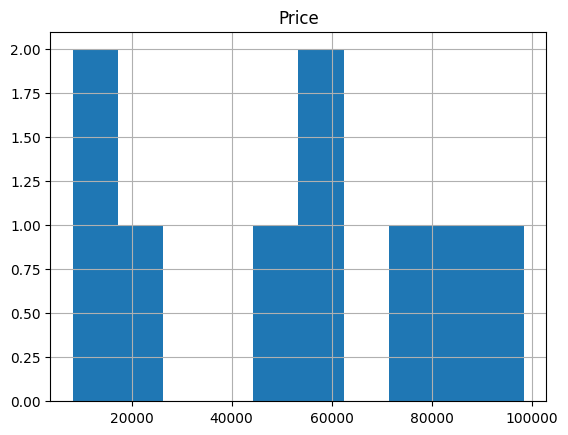

In [452]:
#add your code
phones_Dataframe.hist()

<Figure size 640x480 with 0 Axes>

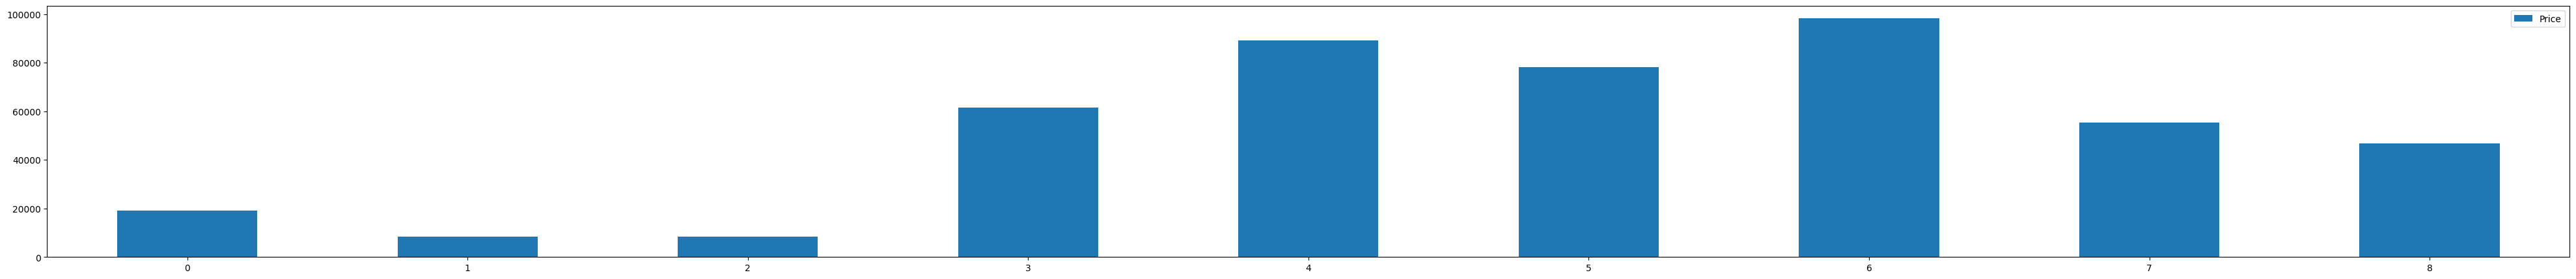

In [453]:
fig = plt.figure()
phones_Dataframe.plot.bar(rot=0,figsize=(50,5))
fig.show()